In [1]:
# Initialization

## Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor
from sklearn.datasets import make_regression


import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd
from IPython.display import display
import ipywidgets as widgets

import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
import ipywidgets as widgets
from IPython.display import display, clear_output

# Data demo 1

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create sliders for the data generation parameters and RANSAC settings
n_samples_slider = widgets.IntSlider(min=100, max=2000, value=1000, description='n_samples:')
n_outliers_slider = widgets.IntSlider(min=0, max=500, value=200, description='n_outliers:')
noise_slider = widgets.FloatSlider(min=0, max=50, value=10, description='noise:')
outlier_x_mean_slider = widgets.FloatSlider(min=-10, max=10, value=3, description='Outlier X Mean:')
outlier_x_std_slider = widgets.FloatSlider(min=0, max=5, value=0.5, description='Outlier X Std:')
outlier_y_mean_slider = widgets.FloatSlider(min=-50, max=50, value=-3, description='Outlier Y Mean:')
outlier_y_std_slider = widgets.FloatSlider(min=0, max=50, value=10, description='Outlier Y Std:')
ransac_residual_threshold_slider = widgets.FloatSlider(min=0, max=200, value=100, description='Residual Threshold:')

# Display the sliders
display(n_samples_slider, n_outliers_slider, noise_slider, outlier_x_mean_slider, outlier_x_std_slider, outlier_y_mean_slider, outlier_y_std_slider, ransac_residual_threshold_slider)

# Create an output widget to hold the plot
output = widgets.Output()
display(output)

X, y, coef = None, None, None

# Function to update the plot based on the slider values
def update_plot(change=None):
    global X, y, coef
    with output:
        clear_output(wait=True)
        
        n_samples = n_samples_slider.value
        n_outliers = n_outliers_slider.value
        noise = noise_slider.value
        outlier_x_mean = outlier_x_mean_slider.value
        outlier_x_std = outlier_x_std_slider.value
        outlier_y_mean = outlier_y_mean_slider.value
        outlier_y_std = outlier_y_std_slider.value
        residual_threshold = ransac_residual_threshold_slider.value
        
        # Generate linear dataset
        X, y, coef = datasets.make_regression(
            n_samples=n_samples,
            n_features=1,
            n_informative=1,
            noise=noise,
            coef=True
        )

        # Add outlier data
        np.random.seed(0)
        X[:n_outliers] = outlier_x_mean + outlier_x_std * np.random.normal(size=(n_outliers, 1))
        y[:n_outliers] = outlier_y_mean + outlier_y_std * np.random.normal(size=n_outliers)

        # Fit line using all data
        lr = linear_model.LinearRegression()
        lr.fit(X, y)

        # Robustly fit linear model with RANSAC algorithm
        ransac = linear_model.RANSACRegressor(residual_threshold=residual_threshold)
        ransac.fit(X, y)

        inlier_mask = ransac.inlier_mask_
        outlier_mask = np.logical_not(inlier_mask)

        # Predict data of estimated models
        line_X = np.arange(X.min(), X.max())[:, np.newaxis]
        line_y = lr.predict(line_X)
        line_y_ransac = ransac.predict(line_X)

        # Compare estimated coefficients
        print("Estimated coefficients (true, linear regression, RANSAC):")
        print(coef, lr.coef_, ransac.estimator_.coef_)

        lw = 2
        plt.scatter(
            X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers"
        )
        plt.scatter(
            X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers"
        )
        plt.plot(line_X, line_y, color="navy", linewidth=lw, label="Linear regressor")
        plt.plot(
            line_X,
            line_y_ransac,
            color="cornflowerblue",
            linewidth=lw,
            label="RANSAC regressor",
        )
        plt.legend(loc="lower right")
        plt.xlabel("Input")
        plt.ylabel("Response")
        plt.show()

# Register the callback function to update the plot when the widget values change
n_samples_slider.observe(update_plot, 'value')
n_outliers_slider.observe(update_plot, 'value')
noise_slider.observe(update_plot, 'value')
outlier_x_mean_slider.observe(update_plot, 'value')
outlier_x_std_slider.observe(update_plot, 'value')
outlier_y_mean_slider.observe(update_plot, 'value')
outlier_y_std_slider.observe(update_plot, 'value')
ransac_residual_threshold_slider.observe(update_plot, 'value')

# Initial plot
update_plot()


IntSlider(value=1000, description='n_samples:', max=2000, min=100)

IntSlider(value=200, description='n_outliers:', max=500)

FloatSlider(value=10.0, description='noise:', max=50.0)

FloatSlider(value=3.0, description='Outlier X Mean:', max=10.0, min=-10.0)

FloatSlider(value=0.5, description='Outlier X Std:', max=5.0)

FloatSlider(value=-3.0, description='Outlier Y Mean:', max=50.0, min=-50.0)

FloatSlider(value=10.0, description='Outlier Y Std:', max=50.0)

FloatSlider(value=100.0, description='Residual Threshold:', max=200.0)

Output()

### RANSAC Iterations Formula

The number of RANSAC iterations \( T \) can be calculated using the following formula:

\[ 
T = \frac{ \log(1 - p) }{ \log(1 - (1 - e)^s) } 
\]

where:
- \( p \) is the probability of success,
- \( e \) is the outlier ratio,
- \( s \) is the number of samples.


In [5]:
from PIL import Image

# List to store the images
images = []

# Run RANSAC for 10 iterations
for i in range(10):
    # Perform RANSAC iteration and update the plot
    update_plot()
    
    # Save the current plot as an image
    plt.savefig(f'iteration_{i}.png')
    
    # Open the saved image and append it to the list
    image = Image.open(f'iteration_{i}.png')
    images.append(image)

# Save the list of images as a GIF
images[0].save('ransac_iterations.gif', save_all=True, append_images=images[1:], optimize=False, duration=500, loop=0)


<Figure size 640x480 with 0 Axes>

In [69]:
# Initialize the best fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y_best_fit = lr.predict(line_X)
best_score = lr.score(X, y)

# Perform 10 RANSAC iterations and save plots
n_iterations = 10
frames = []

for iteration in range(n_iterations):
    ransac = linear_model.RANSACRegressor(max_trials=iteration+1, residual_threshold=30)
    ransac.fit(X, y)
    inlier_mask = ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)

    # Predict data of estimated models
    line_y_ransac = ransac.predict(line_X)
    
    # Update the best fit line if the current model has a better score
    current_score = ransac.score(X[inlier_mask], y[inlier_mask])
    if current_score > best_score:
        best_score = current_score
        line_y_best_fit = line_y_ransac

    # Create plot
    plt.figure()
    plt.scatter(X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers")
    plt.scatter(X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers")
    
    # Plot best fit line
    plt.plot(line_X, line_y_best_fit, color="gray", linewidth=2, linestyle='--', label="Best fit line")
    plt.plot(line_X, line_y_ransac, color="cornflowerblue", linewidth=2, label="RANSAC regressor")
    
    plt.legend(loc="lower right")
    plt.xlabel("Input")
    plt.ylabel("Response")
    plt.title(f"RANSAC Iteration {iteration + 1}")

    # Save plot to a BytesIO object
    buf = BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    frames.append(imageio.imread(buf))
    buf.close()
    plt.close()

# Create GIF from frames
imageio.mimsave('ransac_iterations.gif', frames, fps=1)

print("GIF created successfully!")


GIF created successfully!


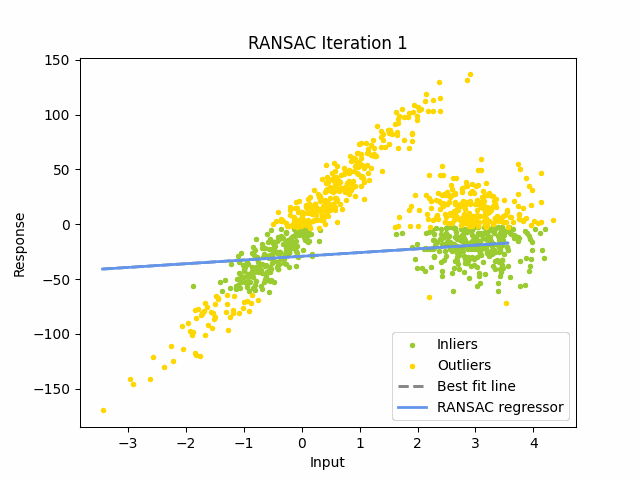

In [70]:
from IPython.display import Image

# Display the GIF
display(Image(filename='ransac_iterations.gif'))
